# GRU Test Code

In [1]:
import warnings
warnings.filterwarnings('ignore')

> ## Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# I. GRU - without Normalization

> ## 1) Sample Data

* Inputs 데이터 생성(100, 5, 1)

In [3]:
X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

* Outputs 데이터 생성(100, 1)

In [4]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [5]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

* 80:20

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras GRU Modeling

### (1) Model Define & Summary
* Unit(output_dim) : 3
* input_shape(input_lenght, input_dim) : (5, 1)
* return_sequences = False : 최종 Unit만 출력
* layers.Dense(1) : y_hat


In [7]:
from tensorflow.keras import models, layers

model_1 = models.Sequential(name = 'GRU_1')
model_1.add(layers.GRU(3,
                       input_shape = (5, 1), 
                       return_sequences = False))
model_1.add(layers.Dense(1))

model_1.summary()

Model: "GRU_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3)                 54        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [8]:
model_1.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['mae'])

### (3) Model Fit

In [9]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test), verbose = 0)

### (4) Model Predict

In [10]:
y_hat = model_1.predict(X_test, verbose = 0)

### (5) 학습 결과 시각화

* Loss 감소

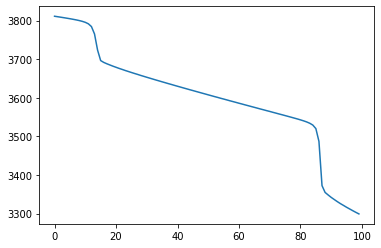

In [11]:
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습 되지 않음
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

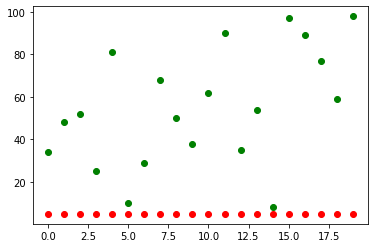

In [12]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# II. GRU - with Normalization

> ## 1) Sample Data - with Normalization

In [13]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [14]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras GRU Modeling

### (1) Model Define & Summary
* None : input_length 자동 맞춤


In [16]:
model_2 = models.Sequential(name = 'GRU_2')
model_2.add(layers.GRU(3,
                       input_shape = (None, 1), 
                       return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "GRU_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 3)                 54        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [17]:
model_2.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['mae'])

### (3) Model Fit

In [18]:
Hist_2 = model_2.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test), verbose = 0)

### (4) Model Predict

In [19]:
y_hat = model_2.predict(X_test, verbose = 0)

### (5) 학습 결과 시각화

* Loss 감소

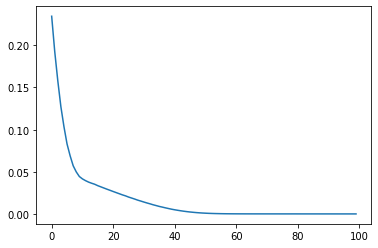

In [20]:
plt.plot(Hist_2.history['loss'])
plt.show()

* 학습 진행
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

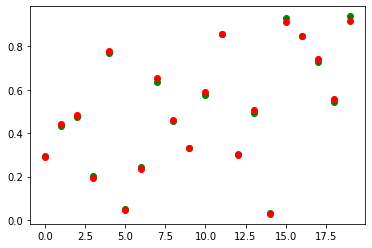

In [21]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# III. Stacked_GRU

> ## 1) Model Define & Summary

* return_sequences = True

In [22]:
model_3 = models.Sequential(name = 'Stackd_GRU')
model_3.add(layers.GRU(3,
                       input_shape = (None, 1), 
                       return_sequences = True))
model_3.add(layers.GRU(3,
                       input_shape = (None, 1),
                       return_sequences = False))
model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stackd_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, None, 3)           54        
                                                                 
 gru_3 (GRU)                 (None, 3)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [23]:
model_3.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['mae'])

> ## 3) Model Fit

In [24]:
Hist_3 = model_3.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test), verbose = 0)

> ## 4) Model Predict

In [25]:
y_hat = model_3.predict(X_test, verbose = 0)

> ## 5) 학습 결과 시각화

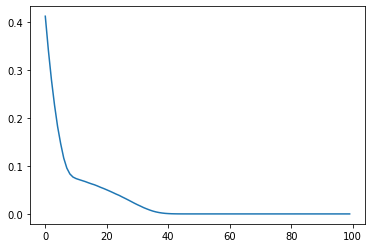

In [26]:
plt.plot(Hist_3.history['loss'])
plt.show()

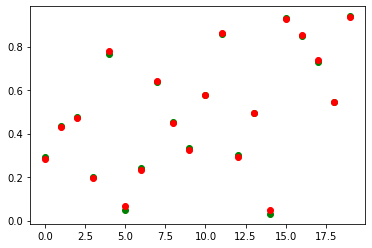

In [27]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# 
# 
# 
# The End
# 
# 
# 